In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering

In [2]:
class SpectralClustering_test:
    def __init__(self,sigma,k):
        self.sigma = sigma
        self.k = k
        self.labels = None
        
    def fit(self,X):
        W = np.zeros([X.shape[0],X.shape[0]])
        D = np.zeros([X.shape[0],X.shape[0]])
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                W[i][j] = (np.e ** ((-np.linalg.norm(X[i] - X[j])) / (2 * self.sigma**2)))
                if i == j:
                    W[i][j] = 0
                

        for m in range(W.shape[0]):
            D[m][m] = np.sum(W[m])
        
        L = D - W
        
        eigens = np.linalg.eigh(L)
        eigens_need = eigens[1][:,1:self.k]
        
        means = KMeans(n_clusters=self.k).fit(eigens_need)
                
        self.labels = means.labels_ 
    
    def predict(self):
        return self.labels

In [3]:
X, y = make_blobs(n_samples=50, centers=4, random_state=42,cluster_std=2)
a = SpectralClustering_test(sigma=2,k=3)
a.fit(X)
y = a.predict()

In [4]:
spectral = SpectralClustering(n_clusters=3,gamma=2).fit(X)


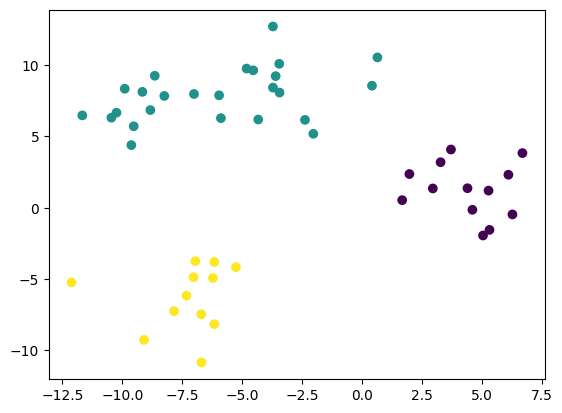

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

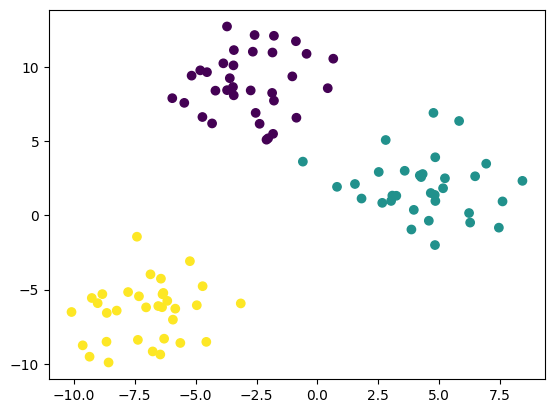

In [8]:
X, y = make_blobs(n_samples=100, centers=3, random_state=42,cluster_std=2)
plt.scatter(X[:,0],X[:,1],c=y)